In [1]:
#import libraries required for analysis
from change_detection import functions as chg
from change_detection import *
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from ebmdatalab import bq
from ebmdatalab import charts
from ebmdatalab import maps

In [3]:
opioids = chg.ChangeDetection('practice_data_opioid%',
                              measure=True,
                              direction='down',
                              overwrite=True).run() #This is commented so the code isn't rerun and files reproduced -its takes circa 30 min per measure

Downloading: 100%|█████████████████████████████████████████████████████████████████████| 3/3 [00:00<00:00,  7.18rows/s]


In [ ]:
#import os
#os.listdir(opioids.get_working_dir(opioids.name))

In [4]:
opioids = chg.ChangeDetection('practice_data_opioid%',measure=True)
opioids = opioids.concatenate_outputs()

In [5]:
opioids = opioids.reset_index()
opioids.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
0,practice_data_opioidome,A81001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,practice_data_opioidome,A81002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,practice_data_opioidome,A81004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,practice_data_opioidome,A81005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,practice_data_opioidome,A81006,1,5.0,5.0,5.0,5.0,5.0,130.919441,0.003036,0.517857,42998.525416,50330.014139,-7331.488723,-0.170506


In [76]:
practice_data_opioidome = opioids.loc[(opioids["measure"] == "practice_data_opioidome")]


In [7]:
practice_data_opioidspercent = opioids.loc[(opioids["measure"] == "practice_data_opioidspercent")]
practice_data_opioidspercent.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
14799,practice_data_opioidspercent,A81001,2,47.0,47.0,49.0,49.0,49.0,-0.014454,-0.045485,0.566586,0.262095,0.185561,0.076534,0.292010
14800,practice_data_opioidspercent,A81002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14801,practice_data_opioidspercent,A81004,1,20.0,20.0,20.0,20.0,20.0,-0.001851,-0.005808,0.523810,0.320562,0.242812,0.077750,0.242544
14802,practice_data_opioidspercent,A81005,2,21.0,21.0,22.0,22.0,22.0,-0.006190,-0.020519,0.592839,0.106276,0.054070,0.052206,0.491231
14803,practice_data_opioidspercent,A81006,2,19.0,19.0,37.0,37.0,19.0,0.003499,0.024312,0.619252,0.140401,0.146050,-0.005650,-0.040239


In [8]:
practice_data_opioidper1000 = opioids.loc[(opioids["measure"] == "practice_data_opioidper1000")]
practice_data_opioidper1000.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
7434,practice_data_opioidper1000,A81001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7435,practice_data_opioidper1000,A81002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7436,practice_data_opioidper1000,A81004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7437,practice_data_opioidper1000,A81005,3,20.0,20.0,20.0,20.0,22.0,-4.469191,-0.980027,6.611756,1.147182,0.471236,0.675946,0.589223
7438,practice_data_opioidper1000,A81006,2,17.0,17.0,17.0,17.0,17.0,0.060606,0.034765,0.516088,1.682711,2.152445,-0.469734,-0.279153


## Total OME

In [9]:
practice_data_opioidome["name"].nunique() #count of number of practices

7434

In [10]:
practice_data_opioidome = practice_data_opioidome.replace([np.inf, -np.inf], np.nan) #replace infinite values https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas
practice_data_opioidome.head()

,measure,name,is.nbreak,is.tfirst,is.tfirst.pknown,is.tfirst.pknown.offs,is.tfirst.offs,is.tfirst.big,is.slope.ma,is.slope.ma.prop,is.slope.ma.prop.lev,is.intlev.initlev,is.intlev.finallev,is.intlev.levd,is.intlev.levdprop
0,practice_data_opioidome,A81001,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,practice_data_opioidome,A81002,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,practice_data_opioidome,A81004,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,practice_data_opioidome,A81005,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,practice_data_opioidome,A81006,1,5.0,5.0,5.0,5.0,5.0,130.919441,0.003036,0.517857,42998.525416,50330.014139,-7331.488723,-0.170506


In [61]:
decile_ome = pd.read_csv(r'C:\Users\bmackenna\Documents\GitHub\opioids-change-detection\data\practice_data_opioid\practice_data_opioidome\bq_cache.csv') ##why can't it find file if shortened url?
decile_ome['calc_value'] = decile_ome['numerator'] / decile_ome['denominator']
decile_ome['month'] = pd.to_datetime(decile_ome['month'])
decile_ome.head()


,month,code,numerator,denominator,calc_value
0,2017-10-01,A81001,207714.0,4.147,50087.774295
1,2019-10-01,A81001,202485.0,4.103,49350.475262
2,2018-10-01,A81001,220460.0,4.089,53915.382734
3,2018-08-01,A81001,243236.2,4.119,59052.245691
4,2015-06-01,A81001,210548.0,4.187,50286.123716


In [65]:
with pd.option_context('mode.use_inf_as_null', True):
     df =  decile_ome.sort_values('calc_value', ascending=False, na_position='last')
df.head(10)

,month,code,numerator,denominator,calc_value
234771,2019-08-01,H82641,20950.4,0.001,2.095040e+07
443798,2017-02-01,Y05548,27409.6,0.003,9.136533e+06
62411,2017-05-01,C81629,14007.6,0.002,7.003800e+06
438329,2017-06-01,Y02873,49932.0,0.008,6.241500e+06
443786,2017-03-01,Y05548,18504.8,0.003,6.168267e+06
248949,2019-04-01,J81055,6081.2,0.001,6.081200e+06
38415,2019-06-01,B83011,6077.0,0.001,6.077000e+06
438292,2018-01-01,Y02873,23134.0,0.004,5.783500e+06
234746,2019-07-01,H82641,45280.8,0.008,5.660100e+06
62424,2017-04-01,C81629,11116.4,0.002,5.558200e+06


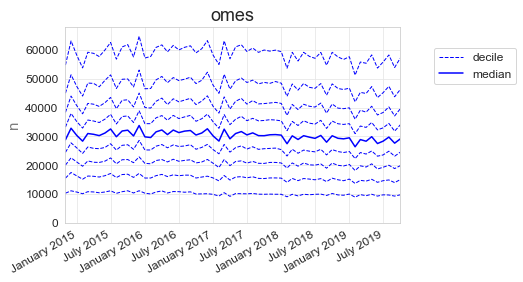

In [42]:
charts.deciles_chart(
        decile_ome,
        period_column='month',
        column='calc_value',
        title="omes",
        ylabel="n",
        show_outer_percentiles=False,
        show_legend=True
)


plt.show()


In [12]:
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns

In [66]:
offset_date = practice_data_opioidome['is.tfirst.big'] -1
offset_date = offset_date.dropna().apply(lambda x: relativedelta(months=x))
practice_breaks_ome = decile_ome['month'].min() + offset_date
#practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] = practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] + pd.DateOffset(days=1)
practice_breaks_ome.head()

4    2015-03-01
5    2017-06-01
6    2015-08-01
8    2016-01-01
12   2015-08-01
Name: is.tfirst.big, dtype: datetime64[ns]

In [67]:
mean_slope = practice_data_opioidome[['is.tfirst.big','is.slope.ma']]
mean_slope = mean_slope.groupby('is.tfirst.big').mean()
mean_slope = pd.concat([mean_slope,pd.DataFrame([[0]], columns=['is.slope.ma'])],axis=0)
mean_slope = mean_slope.sort_index()
mean_slope.head()#.plot.bar()

,is.slope.ma
0.0,0.000000
2.0,1131.579676
3.0,-964.014067
4.0,-1151.166348
5.0,-153.132725


In [68]:
mean_change = practice_data_opioidome[['is.tfirst.big','is.intlev.levd']]
mean_change = mean_change.groupby('is.tfirst.big').mean()
mean_change = pd.concat([mean_change,pd.DataFrame([[0]], columns=['is.intlev.levd'])],axis=0)
mean_change = mean_change.sort_index()
mean_change.head()#.plot.bar()


,is.intlev.levd
0.0,0.000000
2.0,-2435.878106
3.0,11998.489173
4.0,1635.084465
5.0,-4616.647182


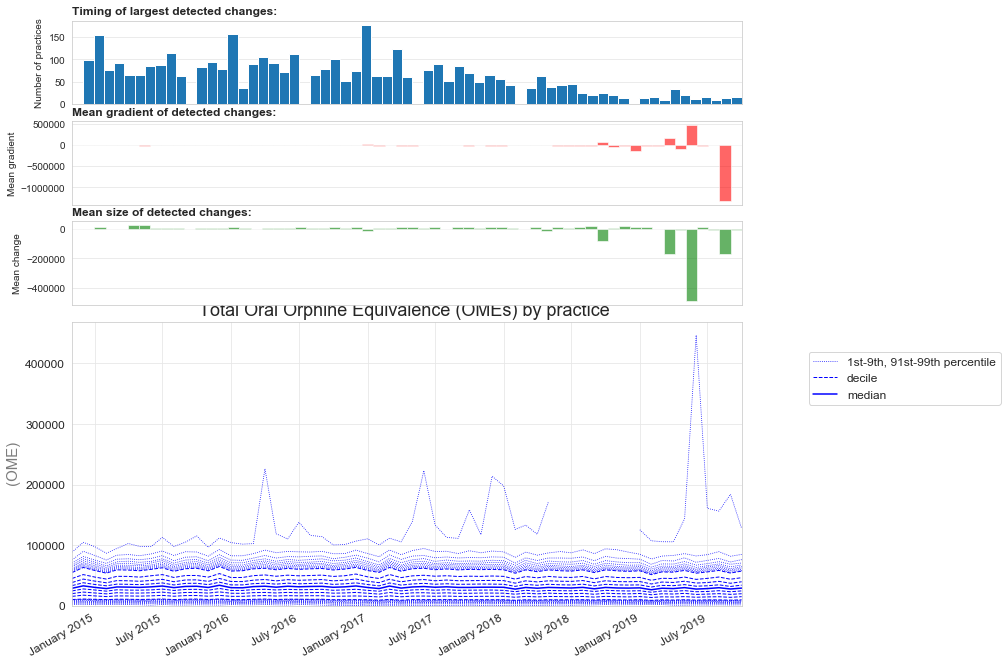

In [75]:
# Plot figure with subplots of different sizes
fig,ax = plt.subplots(1)
# set up subplot grid
gridspec.GridSpec(7,4)

# decile subplot

ax = plt.subplot2grid((7,4), (3,0), colspan=4, rowspan=3)
charts.deciles_chart(
        decile_ome,
        period_column='month',
        column='calc_value',
        title="Total Oral Orphine Equivalence (OMEs) by practice ",
        ylabel=" (OME) ",
        show_outer_percentiles=True,
        show_legend=True,
        ax=ax
)
#ax.set_title('Practice deciles and extreme percentiles:',loc='left',fontweight='bold')
#ax.set_ylabel('Proportion of Cerazette prescribing')
#ax.set_xlim([practice_deciles_cer.index.min(),practice_deciles_cer.index.max()])
#ax.set_xlabel('Year', fontsize = 11)
#ax.set_ylim([0,1])



#ax.axvline(x='2012-12-01',linewidth=1, color='k')
#ax.axvline(x='2013-07-01',linewidth=1, color='k')
#ax.annotate('Cerazette patent expired', ('2012-12-08',0.65),
 #           fontweight='bold',rotation=90,fontsize=14,color='#2a72a3',alpha=.9)
#ax.annotate('Price begins to drop', ('2013-07-08',0.53),
 #           fontweight='bold',rotation=90,fontsize=14,color='#2a72a3',alpha=.9)

# timing of change
ax = plt.subplot2grid((7,4), (0,0), colspan=4)
ax.set_title('Timing of largest detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Number of practices')
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim([decile_ome['month'].min(),decile_ome['month'].max()])
ax.set_xticks([])
ax.hist(practice_breaks_ome, bins=64)
#ax.axvline(x='2012-12-01',linewidth=1, color='k')
#ax.axvline(x='2013-07-01',linewidth=1, color='k')

# gradient of change
ax = plt.subplot2grid((7,4), (1,0), colspan=4)
ax.set_title('Mean gradient of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean gradient')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_slope.plot.bar(ax=ax, width=1, color = 'r',alpha=.6)
#ax.axvline(x=28,linewidth=1, color='k') commented out put used to put a time pint line in
#ax.axvline(x=35,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# magnitude of change
ax = plt.subplot2grid((7,4), (2,0), colspan=4)
ax.set_title('Mean size of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean change')
ax.axes.xaxis.set_visible(False)
mean_change.plot.bar(ax=ax, width=1, color = 'g',alpha=.6)
#ax.axvline(x=28,linewidth=1, color='k')
#ax.axvline(x=35,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# fit subplots and save fig
fig.set_size_inches(w=12,h=14)
fig.savefig('data/practice_data_opioid/ome.png',
            format='png', dpi=300,bbox_inches='tight')

## High dose opioids per 1000 patients

[High dose opioids per 1000 patients](https://openprescribing.net/measure/opioidper1000/)

In [78]:
practice_data_opioidspercent = practice_data_opioidspercent.replace([np.inf, -np.inf], np.nan) #replace infinite values https://stackoverflow.com/questions/17477979/dropping-infinite-values-from-dataframes-in-pandas


In [79]:
decile_highdose = pd.read_csv(r'C:\Users\bmackenna\Documents\GitHub\opioids-change-detection\data\practice_data_opioid\practice_data_opioidspercent\bq_cache.csv') ##why can't it find file if shortened url?
decile_highdose['calc_value'] = decile_highdose['numerator'] / decile_highdose['denominator']
decile_highdose['month'] = pd.to_datetime(decile_highdose['month'])
decile_highdose.head()

,month,code,numerator,denominator,calc_value
0,2018-11-01,A81001,19,61,0.311475
1,2019-08-01,A81001,13,62,0.209677
2,2014-11-01,A81001,12,57,0.210526
3,2019-07-01,A81001,13,65,0.200000
4,2017-12-01,A81001,16,59,0.271186


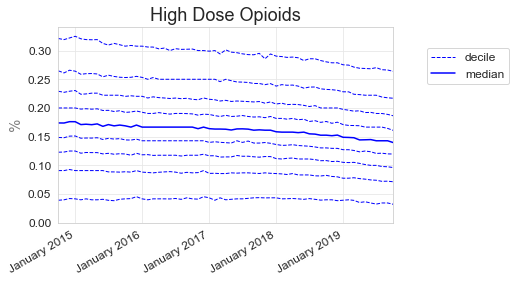

In [82]:
charts.deciles_chart(
        decile_highdose,
        period_column='month',
        column='calc_value',
        title="High Dose Opioids",
        ylabel=" % ",
        show_outer_percentiles=False,
        show_legend=True
)


plt.show()

In [84]:
from dateutil.relativedelta import relativedelta
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.gridspec as gridspec
import seaborn as sns

In [88]:
offset_date = practice_data_opioidspercent['is.tfirst.big'] -1
offset_date = offset_date.dropna().apply(lambda x: relativedelta(months=x))
practice_breaks_highdose = decile_highdose['month'].min() + offset_date
#practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] = practice_breaks_cer.loc[practice_breaks_cer=='2013-03-01'] + pd.DateOffset(days=1)
practice_breaks_highdose.head()

14799   2018-10-01
14801   2016-05-01
14802   2016-07-01
14803   2016-04-01
14804   2016-02-01
Name: is.tfirst.big, dtype: datetime64[ns]

In [92]:
mean_slope_hdose = practice_data_opioidspercent[['is.tfirst.big','is.slope.ma']]
mean_slope_hdose = mean_slope_hdose.groupby('is.tfirst.big').mean()
mean_slope_hdose = pd.concat([mean_slope_hdose,pd.DataFrame([[0]], columns=['is.slope.ma'])],axis=0)
mean_slope_hdose = mean_slope_hdose.sort_index()
mean_slope_hdose.head()#.plot.bar()

,is.slope.ma
0.0,0.000000
2.0,-0.028296
3.0,-0.021825
4.0,-0.009911
5.0,-0.020039


In [93]:
mean_change_hdose = practice_data_opioidspercent[['is.tfirst.big','is.intlev.levd']]
mean_change_hdose = mean_change_hdose.groupby('is.tfirst.big').mean()
mean_change_hdose = pd.concat([mean_change_hdose,pd.DataFrame([[0]], columns=['is.intlev.levd'])],axis=0)
mean_change_hdose = mean_change_hdose.sort_index()
mean_change_hdose.head()#.plot.bar()

,is.intlev.levd
0.0,0.000000
2.0,0.140382
3.0,0.127346
4.0,0.103345
5.0,0.078092


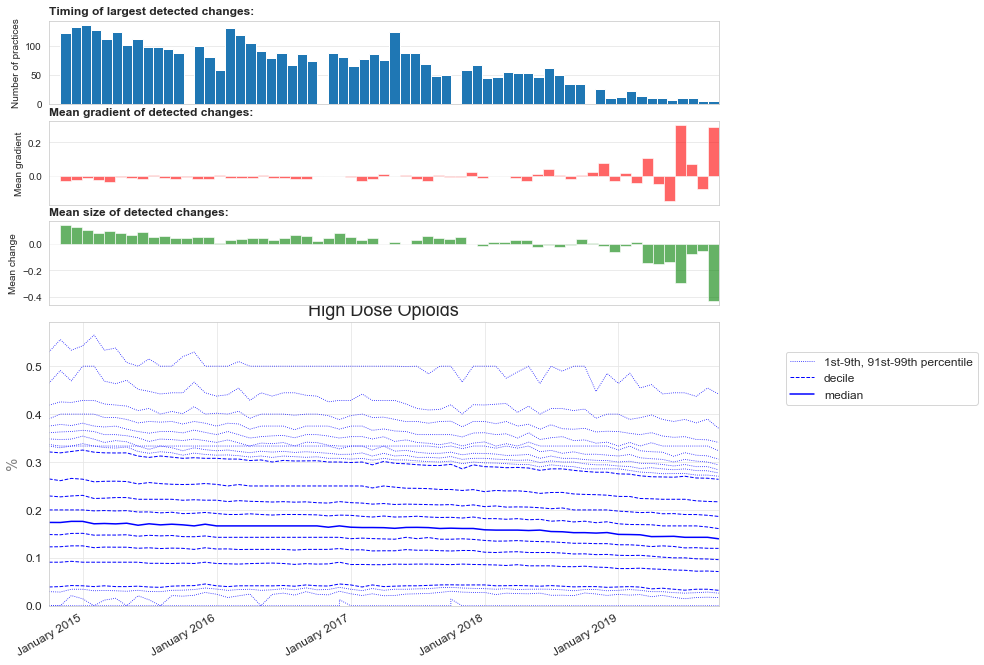

In [96]:
# Plot figure with subplots of different sizes
fig,ax = plt.subplots(1)
# set up subplot grid
gridspec.GridSpec(7,4)

# decile subplot

ax = plt.subplot2grid((7,4), (3,0), colspan=4, rowspan=3)
charts.deciles_chart(
        decile_highdose,
        period_column='month',
        column='calc_value',
        title=" High Dose Opioids ",
        ylabel=" % ",
        show_outer_percentiles=True,
        show_legend=True,
        ax=ax
)
#ax.set_title('Practice deciles and extreme percentiles:',loc='left',fontweight='bold')
#ax.set_ylabel('Proportion of Cerazette prescribing')
#ax.set_xlim([practice_deciles_cer.index.min(),practice_deciles_cer.index.max()])
#ax.set_xlabel('Year', fontsize = 11)
#ax.set_ylim([0,1])



#ax.axvline(x='2012-12-01',linewidth=1, color='k')
#ax.axvline(x='2013-07-01',linewidth=1, color='k')
#ax.annotate('Cerazette patent expired', ('2012-12-08',0.65),
 #           fontweight='bold',rotation=90,fontsize=14,color='#2a72a3',alpha=.9)
#ax.annotate('Price begins to drop', ('2013-07-08',0.53),
 #           fontweight='bold',rotation=90,fontsize=14,color='#2a72a3',alpha=.9)

# timing of change
ax = plt.subplot2grid((7,4), (0,0), colspan=4)
ax.set_title('Timing of largest detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Number of practices')
ax.axes.xaxis.set_ticklabels([])
ax.set_xlim([decile_highdose['month'].min(),decile_highdose['month'].max()])
ax.set_xticks([])
ax.hist(practice_breaks_highdose, bins=64)
#ax.axvline(x='2012-12-01',linewidth=1, color='k')
#ax.axvline(x='2013-07-01',linewidth=1, color='k')

# gradient of change
ax = plt.subplot2grid((7,4), (1,0), colspan=4)
ax.set_title('Mean gradient of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean gradient')
ax.axes.xaxis.set_visible(False)
#ax.set_ylim([-0.25,0])
mean_slope_hdose.plot.bar(ax=ax, width=1, color = 'r',alpha=.6)
#ax.axvline(x=28,linewidth=1, color='k') commented out put used to put a time pint line in
#ax.axvline(x=35,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# magnitude of change
ax = plt.subplot2grid((7,4), (2,0), colspan=4)
ax.set_title('Mean size of detected changes:',loc='left',fontweight='bold')
ax.set_ylabel('Mean change')
ax.axes.xaxis.set_visible(False)
mean_change_hdose.plot.bar(ax=ax, width=1, color = 'g',alpha=.6)
#ax.axvline(x=28,linewidth=1, color='k')
#ax.axvline(x=35,linewidth=1, color='k')
ax.autoscale(enable=True, axis='x', tight=True)
ax.legend_.remove()

# fit subplots and save fig
fig.set_size_inches(w=12,h=14)
fig.savefig('data/practice_data_opioid/ome.png',
            format='png', dpi=300,bbox_inches='tight')